In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import matplotlib
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from keras.models import Sequential
from keras.layers import Dense
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(16)

Using TensorFlow backend.


In [ ]:
try:
    df = pd.read_csv('/content/drive/My Drive/combined-swell-classification-eda-dataset.csv')
except:
    print("""
      Dataset not found in your computer.
      """)
    quit()

In [ ]:
X = df.drop(columns=['condition','NasaTLX class','Condition Label','NasaTLX Label'],axis=1)
X[0:5]

,MEAN,MAX,MIN,RANGE,KURT,SKEW,MEAN_1ST_GRAD,STD_1ST_GRAD,MEAN_2ND_GRAD,STD_2ND_GRAD,ALSC,INSC,APSC,RMSC,MIN_PEAKS,MAX_PEAKS,STD_PEAKS,MEAN_PEAKS,MIN_ONSET,MAX_ONSET,STD_ONSET,MEAN_ONSET,subject_id,MEAN_LOG,INSC_LOG,APSC_LOG,RMSC_LOG,RANGE_LOG,ALSC_LOG,MIN_LOG,MEAN_1ST_GRAD_LOG,MEAN_2ND_GRAD_LOG,MIN_LOG_LOG,MEAN_1ST_GRAD_LOG_LOG,MEAN_2ND_GRAD_LOG_LOG,APSC_LOG_LOG,ALSC_LOG_LOG,APSC_BOXCOX,RMSC_BOXCOX,RANGE_BOXCOX,MEAN_YEO_JONSON,SKEW_YEO_JONSON,KURT_YEO_JONSON,APSC_YEO_JONSON,MIN_YEO_JONSON,MAX_YEO_JONSON,MEAN_1ST_GRAD_YEO_JONSON,RMSC_YEO_JONSON,STD_1ST_GRAD_YEO_JONSON,RANGE_SQRT,RMSC_SQUARED,MEAN_2ND_GRAD_CUBE,INSC_APSC
0,0.005488,0.012766,0.001384,0.011382,-0.519100,0.581063,-0.000040,0.002382,-0.000477,0.002256,33.000347,0.186582,0.000039,0.006233,1.228516,44.784180,9.806958,8.117853,1.191406,42.265137,9.571062,8.186006,17,0.005473,0.171077,0.000039,0.006213,0.011318,3.526371,0.001383,-0.000040,-0.000477,0.001382,-0.000040,-0.000477,0.000039,1.509920,-190.552588,-95.276268,-32.501322,0.004183,0.514110,-0.603458,0.000038,0.001081,0.009717,-0.000040,0.004874,0.001931,0.106688,0.000039,-1.082030e-10,4803.271908
1,0.005027,0.018668,0.001947,0.016721,5.943071,2.244724,0.000093,0.002835,0.000366,0.002089,75.000629,0.382067,0.000037,0.006055,1.067383,17.068848,2.735987,3.879486,0.873535,17.759766,2.688697,3.890527,4,0.005015,0.323580,0.000037,0.006036,0.016583,4.330742,0.001945,0.000093,0.000366,0.001943,0.000093,0.000366,0.000037,1.673490,-0.197815,-2.854783,-4.359928,0.002601,2.180816,3.085576,0.000013,0.000761,0.006785,0.000094,0.003308,0.001621,0.129309,0.000037,4.920520e-11,10421.930100
2,0.001066,0.003463,0.000349,0.003114,1.841308,1.237831,-0.000014,0.000521,-0.000026,0.000480,50.000019,0.054390,0.000002,0.001258,2.039551,20.222656,4.111731,5.567012,1.783203,20.322754,4.199508,5.566494,10,0.001066,0.052962,0.000002,0.001257,0.003109,3.931826,0.000349,-0.000014,-0.000026,0.000349,-0.000014,-0.000026,0.000002,1.595709,-1289.202110,-644.601021,-41.648431,0.000859,0.917079,1.308226,0.000002,0.000301,0.002811,-0.000014,0.001023,0.000444,0.055803,0.000002,-1.755513e-14,34355.394127
3,0.005731,0.020365,0.002132,0.018232,5.889044,1.886842,0.000015,0.002185,-0.000072,0.001908,73.000698,0.424125,0.000042,0.006502,1.187988,19.096680,3.265896,3.974282,1.287109,17.394043,3.033075,3.970991,7,0.005715,0.353558,0.000042,0.006481,0.018068,4.304075,0.002130,0.000015,-0.000072,0.002128,0.000015,-0.000072,0.000042,1.668475,-13.591159,-6.795579,-3.608363,0.004832,1.521961,2.964263,0.000041,0.001804,0.017080,0.000015,0.005581,0.001965,0.135027,0.000042,-3.768462e-13,10030.759444
4,0.011977,0.032645,0.004500,0.028145,4.503018,2.070755,-0.001407,0.011272,-0.006015,0.010447,5.000520,0.071859,0.000236,0.015349,4.138672,85.327148,29.969170,31.376367,4.520020,83.107910,29.022323,31.334668,13,0.011905,0.069395,0.000236,0.015233,0.027756,1.791846,0.004490,-0.001408,-0.006033,0.004480,-0.001409,-0.006052,0.000236,1.026703,-11.559561,-5.779781,-4.197678,0.007718,2.554131,3.072284,0.000195,0.002937,0.021636,-0.001400,0.009896,0.006486,0.167764,0.000236,-2.176592e-07,305.010962


In [ ]:
y = df['NasaTLX Label'].values
y[0:5]

array([2, 2, 2, 2, 0])

In [ ]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-2.11772266e-01, -2.99895377e-01, -3.01948694e-01,
        -2.99188712e-01, -9.49891454e-01, -1.33886671e+00,
         6.24929122e-02, -2.51592898e-01, -6.37489374e-02,
        -2.20167824e-01, -2.15582837e-03, -1.49537465e-01,
        -1.48587336e-01, -2.37740741e-01, -1.47074459e-01,
        -4.63557736e-02, -1.66696689e-01, -3.29733107e-01,
        -1.62309124e-01, -1.18661492e-01, -1.75512823e-01,
        -3.27003569e-01,  6.83638760e-01, -2.14520795e-01,
        -8.02802870e-02, -1.50409905e-01, -2.42744797e-01,
        -3.14882388e-01,  2.91731258e-01, -3.04431793e-01,
         6.49073015e-02, -5.78110342e-02, -3.06807581e-01,
         6.69805952e-02, -5.14881057e-02, -1.52193178e-01,
         3.34147248e-01,  1.49467474e-01,  1.50332905e-01,
        -6.52134432e-02, -1.30194490e-01, -9.12056682e-01,
        -1.21637337e+00, -2.31831429e-01, -2.55173180e-01,
        -2.52782958e-01,  3.23833656e-02, -1.55921685e-01,
        -2.08807748e-01, -2.84043371e-01, -1.48587336e-0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
y_train.shape

(78788,)

In [ ]:
model = Sequential()
model.add(Dense(53, activation='relu', input_dim=53))
model.add(Dense(26, activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=220) 


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 53)                2862      
_________________________________________________________________
dense_37 (Dense)             (None, 26)                1404      
_________________________________________________________________
dense_38 (Dense)             (None, 13)                351       
_________________________________________________________________
dense_39 (Dense)             (None, 7)                 98        
_________________________________________________________________
dense_40 (Dense)             (None, 3)                 24        
Total params: 4,739
Trainable params: 4,739
Non-trainable params: 0
_________________________________________________________________
Epoch 1/220
78788/78788 [==============================] - 4s 53us/step - loss: 0.4102 - acc: 0.8287
Epoch 2/220
78788

In [ ]:
scores = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

Training Accuracy: 99.93%

Testing Accuracy: 99.89%



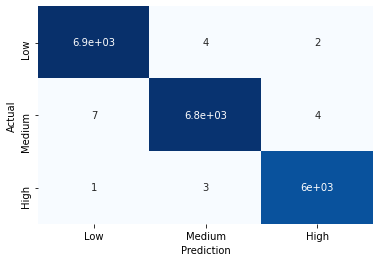

<Figure size 432x288 with 0 Axes>

In [ ]:
y_test_pred = model.predict_classes(X_test)
c_matrix = confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(c_matrix, annot=True, xticklabels=['Low','Medium', 'High'], yticklabels=['Low','Medium', 'High'], cbar=False, cmap='Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()
plt.clf()